# Examining the Relationship Between Trip Duration and Other Factors
## by Sarah Irungu


## Investigation Overview

In this investigation, I wanted to gain insights into the usage patterns and durations. I analyzed the duration variable and also its relationship with other variables e.g. user type and time of day.

## Dataset Overview

The data included in the bike share trip dataset was collected during the month of February 2019. It has more that 170k rows and 16 variables. It includes duration of a trip, start and end time of trips, among other variables. Some rows and columns were removed due to missing data and outliers. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of a Trip Duration

The duration of bike trips has a great range of values from about **50** seconds to **80k** seconds. After plotting using log scale, the distribution has a single peak, giving it a unimodal shape.

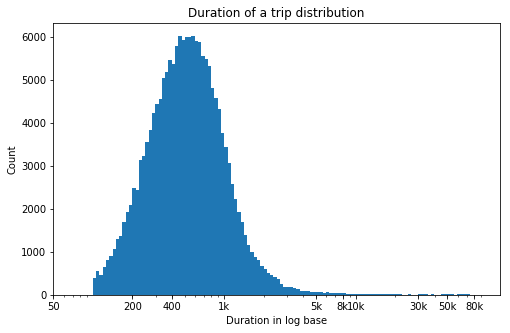

In [4]:
binsize = 0.025
bins = 10 ** np.arange(2, np.log10(bike_df['duration_sec'].max())+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data=bike_df, x='duration_sec', bins=bins)
plt.title('Duration of a trip distribution')
plt.xscale('log')
plt.xticks([50, 200, 400, 1e3, 5e3, 8e3, 1e4, 3e4, 5e4, 8e4], 
            ['50', '200', '400', '1k', '5k', '8k', '10k', '30k', '50k', '80k'])
plt.xlabel('Duration in log base')
plt.ylabel('Count')
plt.show()

## Distribution of Birth Group Year

Birth group year has year of birth grouped into groups of 10 years. The distribution plot shows that many bike users have the year of birth between 1980 and 1989 followed by those of 1990 and 1999.

In [5]:
#base color of seaborn plots
base_color = sb.color_palette()[0]

#seaborn plotting functions
def sb_plot(graph_type, title, x=None, y=None, data=bike_df,
            figsize=[8, 5], legend=None, color=None, order=None, hue=None):
    '''A function that takes parameters of the plotting functions 
    plots different graphs as given in the parameters using seaborn'''
    
    plt.figure(figsize=figsize)
    if graph_type == 'countplot':
        sb.countplot(data=data, x=x, y=y, color=color, order=order, hue=hue)
    elif graph_type == 'violinplot':
        sb.violinplot(data=data, x=x, y=y, hue=hue, order=order)
    elif graph_type == 'pointplot':
        sb.pointplot(data=data, x=x, y=y, hue=hue, dodge=0.3, linestyles='', order=order)
    plt.title(title)
    plt.show()

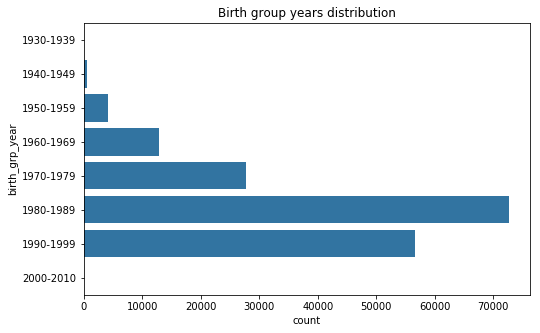

In [6]:
year_order = sorted(bike_df.birth_grp_year.unique())
sb_plot('countplot', 'Birth group years distribution', y='birth_grp_year', color=base_color, order=year_order)

## Day of Week vs Hour of Day

The peak bike usage hours on weekdays fall between 5 a.m and 10 a.m and 3 p.m to 8 p.m, whereas on weekends they occur between 10 a.m and 3 p.m. 

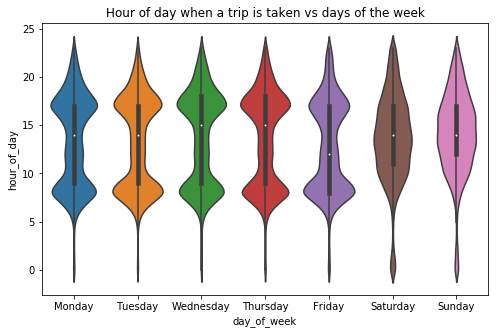

In [8]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb_plot('violinplot', 'Hour of day when a trip is taken vs days of the week',
        x='day_of_week', y='hour_of_day', order=day_order)

## Hour of Day vs Duration Seconds

Between midnight and 5 a.m, we observe the highest average duration time of trips.

In [10]:
# grouping the df by hour of day and calculating the mean of duration secs
duration_mean = bike_df.groupby('hour_of_day')['duration_sec'].mean()
duration_mean = duration_mean.reset_index()

In [11]:
# ploting function
def plot(data, graph_type, x, xlabel, ylabel, title, y=None, binsize=500, figsize=[8,5], legend=None):
    '''A function that takes parameters of the plotting functions 
    plots different graphs as given in the parameters using matplotlib'''
    
    binsize = binsize
    bins = np.arange(0, data[x].max()+binsize, binsize)
    plt.figure(figsize=figsize)
    if graph_type == 'hist':
        plt.hist(data=data, x=x, bins=bins)
    elif graph_type == 'errorbar':
        plt.errorbar(data=data, x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()   

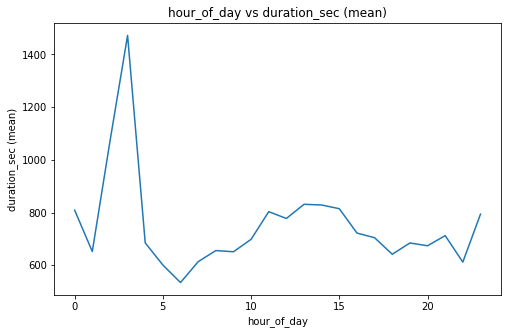

In [12]:
plot(duration_mean, 'errorbar', 'hour_of_day', 'hour_of_day', 
     'duration_sec (mean)', 'hour_of_day vs duration_sec (mean)', y='duration_sec')

## Day of Week vs Duration Seconds vs User Type

Compared to customers, subscribers tend to have a shorter average duration time for their bike usage. This suggests that there may be differences in the patterns of purposes for which subscribers and customers use the bikes.

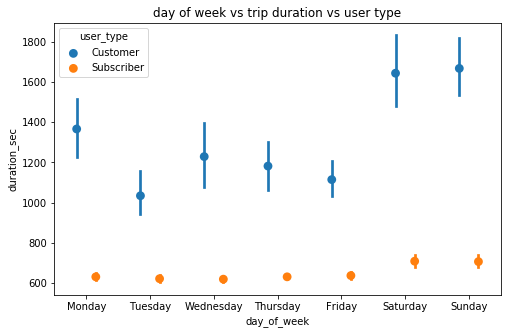

In [14]:
sb_plot('pointplot', 'day of week vs trip duration vs user type', x='day_of_week', 
        y='duration_sec', hue='user_type', order=day_order)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide.ipynb to slides
[NbConvertApp] Writing 416361 bytes to Part_II_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 